In [4]:
#import libraries
%matplotlib inline

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import shutil
import pathlib
import os
import PIL
from PIL import Image
from tqdm import tqdm
from keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Add, Dense, Dropout, BatchNormalization, LSTM
from keras.models import Sequential
from keras.optimizers import adam
from keras.optimizers import Adam,Adagrad,SGD
import graphviz
import random as rn
from PIL import Image
import glob
import cv2 as cv


Using TensorFlow backend.


In [5]:
def assign_label(img,flower_type):
    return flower_type

In [6]:
def load_image(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        img_last =img.split(".")[-1]
        if img_last == 'jpg':
            label=assign_label(img,flower_type)
            path = os.path.join(DIR,img)
            img = cv.imread(path,cv.IMREAD_COLOR)
            img = cv.resize(img, (image_size,image_size)) #will resize to 200,200,3       
            X.append(np.array(img))
            y.append(str(label))

In [7]:
# import data

file_name=[]
X=[]
y=[]
image_size = 200

# I created individual folders for each flower type in lieu of renaming each. This will be their class.
Bluebell = r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images\Bluebell'
Buttercup = r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images\Buttercup'
Colts_Foot = r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images\Colts Foot'
Cowslip = r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images\Cowslip'
Crocus = r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images\Crocus'
Daffodils = r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images\Daffodils'
Daisy = r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images\Daisy'
Dandelion = r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images\Dandelion'
Fritillary = r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images\Fritillary'
Iris = r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images\Iris'
Lily_Valley = r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images\Lily Valley'
Pansy = r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images\Pansy'
Snowdrop = r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images\Snowdrop'
Sunflower = r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images\Sunflower'
Tigerlily = r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images\Tigerlily'
Tulip = r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images\Tulip'
Windflower = r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images\Windflower'

# loading the images
load_image('Bluebell',Bluebell)
load_image('Buttercup',Buttercup)
load_image('Colts Foot',Colts_Foot)
load_image('Cowslip',Cowslip)
load_image('Crocus',Crocus)
load_image('Daffodils',Daffodils)
load_image('Daisy',Daisy)
load_image('Dandelion',Dandelion)
load_image('Fritillary',Fritillary)
load_image('Iris',Iris)
load_image('Lily Valley',Lily_Valley)
load_image('Pansy',Pansy)
load_image('Snowdrop',Snowdrop)
load_image('Sunflower',Sunflower)
load_image('Tigerlily',Tigerlily)
load_image('Tulip',Tulip)
load_image('Windflower',Windflower)

100%|█████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 154.62it/s]


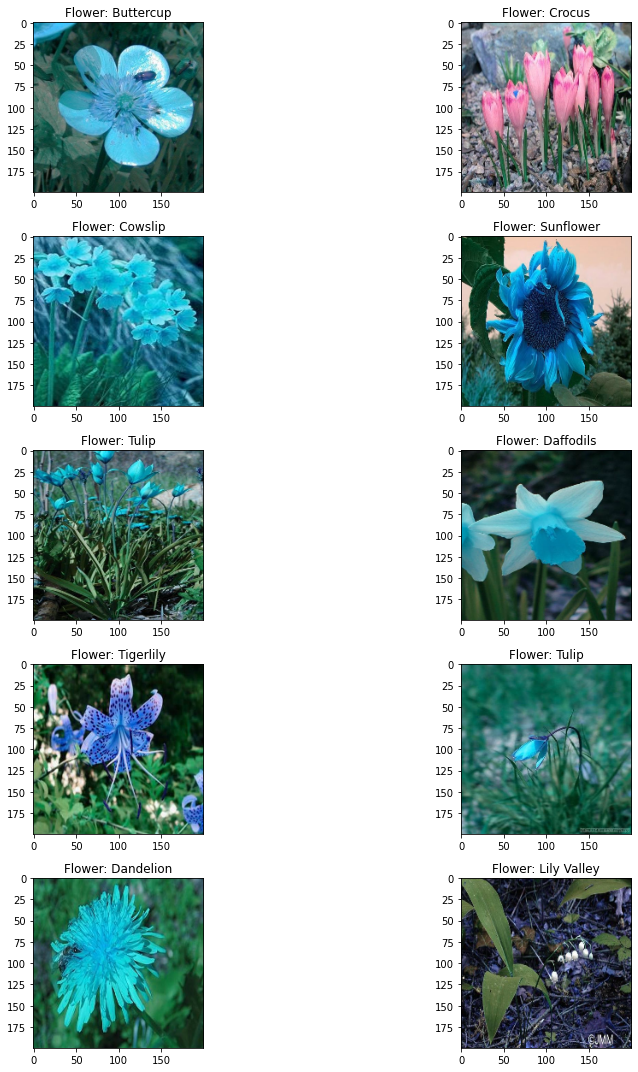

In [8]:
# Images of the individual flowers as examples
fig,ax =plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        l = rn.randint(0,len(y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+y[l])
plt.tight_layout()

In [9]:
# to see the different classes of flowers
classes=os.listdir(r'C:\Users\avand\OneDrive\Desktop\udemy data science\Flower Images')
classes

['Bluebell',
 'Buttercup',
 'Colts Foot',
 'Cowslip',
 'Crocus',
 'Daffodils',
 'Daisy',
 'Dandelion',
 'Fritillary',
 'Iris',
 'Lily Valley',
 'Pansy',
 'Snowdrop',
 'Sunflower',
 'Tigerlily',
 'Tulip',
 'Windflower']

In [10]:
#Label encoding and one hot encoding
le =LabelEncoder()
y=le.fit_transform(y)
y=to_categorical(y,17)
X =np.array(X)


In [11]:
#splitting data
xtrain, xtest, ytrain, ytest = train_test_split(X,y,
                               test_size = 0.2, 
                              random_state=2)

In [13]:
model = Sequential()
model.add(Conv2D(64,(5,5),padding='Same',activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(128,(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(96,(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(128,(3,3),padding='Same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(17,activation='softmax')) #softmax for multiclass classification
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 64)      4864      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 128)     73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 96)       

In [14]:
lr = ReduceLROnPlateau(patience=3,factor=0.1, monitor='val_loss',verbose=1)
epochs = 5
batch_size = 136

In [15]:
model.compile(optimizer=Adam(lr=0.001),
              metrics=['accuracy'],
              loss='categorical_crossentropy')

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(xtrain)

In [17]:
History = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs = epochs, validation_data = (xtest,ytest),
                              verbose = 1, steps_per_epoch=xtrain.shape[0] // batch_size)

Epoch 1/5
8/8 [==============================] - 362s 45s/step - loss: 18.5822 - accuracy: 0.0699 - val_loss: 3.1962 - val_accuracy: 0.0699
Epoch 2/5
8/8 [==============================] - 337s 42s/step - loss: 2.8943 - accuracy: 0.0662 - val_loss: 2.8312 - val_accuracy: 0.0478
Epoch 3/5
8/8 [==============================] - 195s 24s/step - loss: 2.8268 - accuracy: 0.0781 - val_loss: 2.8129 - val_accuracy: 0.0625
Epoch 4/5
8/8 [==============================] - 155s 19s/step - loss: 2.7925 - accuracy: 0.0800 - val_loss: 2.7457 - val_accuracy: 0.0846
Epoch 5/5
8/8 [==============================] - 138s 17s/step - loss: 2.7771 - accuracy: 0.0947 - val_loss: 2.8272 - val_accuracy: 0.0846


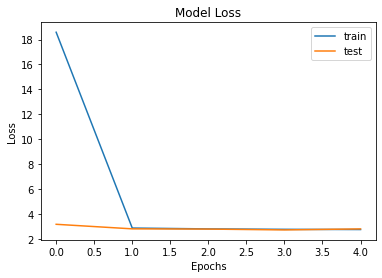

In [18]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

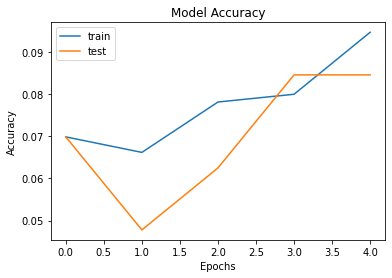

In [19]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [20]:
# getting predictions on val set.
pred=model.predict(xtest)
pred_digits=np.argmax(pred,axis=1)